In [1]:
##Here we have code to replicate figures included in Figure 3 of main paper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../../')
from constants import *
import os
import numpy as np
from scipy import stats


outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [2]:
base_path = '../../../results_metrics_aggregated_bme/response_pred_pcc'

In [3]:
##########
# Baselines (R2/PCC of the GEX before and after treatment)
##########
performance = {}

paths = glob(osp.join(base_path, 'baseline/within/baseline_genetic_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    #Keeps only WITHIN results
    df = df[df['cellline1'] == df['cellline2']]
    
    # Process the new DataFrame to update the dictionary
    method_name = 'Baseline'
    cellline = df['cellline1'].iloc[0]
    
    for topk in [10, 20, 40, 80]:
        for test_cell_line in df['cellline2'].unique():
            dfi = df[df['topk'] == topk]
            dfi = dfi[dfi['cellline2'] == test_cell_line]
            
            metric_data = {
                'R2 - (top {})'.format(topk): [dfi['r2'].mean()],

            }
            
            
            # Initialize nested dictionaries if not already present
            if test_cell_line not in performance:
                performance[test_cell_line] = {}
            
            for metric, value in metric_data.items():
                if metric not in performance[test_cell_line]:
                    performance[test_cell_line][metric] = {}
                if method_name not in performance[test_cell_line][metric]:
                    performance[test_cell_line][metric][method_name] = []
                performance[test_cell_line][metric][method_name] += value

#I only have one split per topK


In [4]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'Biolord/within/biolord_genetic_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [5]:
##########
#CellOT
##########

paths = glob(osp.join(base_path, 'cellOT/within/cellot_genetic_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [6]:
##########
#GEARS
##########

paths = glob(osp.join(base_path, 'GEARS/within/gears_genetic_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'GEARS'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [7]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'scGEN/within/scgen_genetic_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [8]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'PDGrapher/within/pdgrapher_genetic_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [9]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP',
    'BICR6': 'Head-BICR6',
    'U251MG': 'Brain-U251MG',
    'YAPC': 'Pancreas-YAPC',
    'ES2': 'Ovary-ES2',
    'AGS': 'Stomach-AGS'
}

## Panel R2

/tmp/ipykernel_676824/2870957902.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


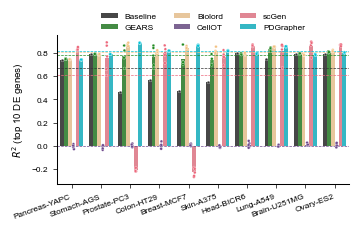

/tmp/ipykernel_676824/2870957902.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


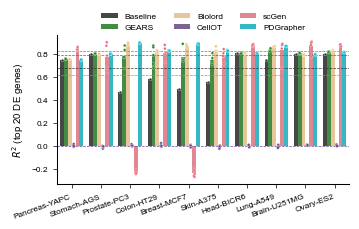

/tmp/ipykernel_676824/2870957902.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


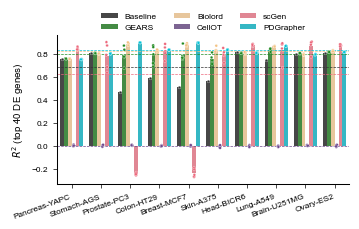

/tmp/ipykernel_676824/2870957902.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


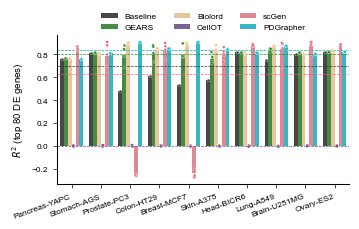

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ['/home/gonzag46/.fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42  # Output Type 42 (TrueType), editable in Illustrator

ytitles = {'R2 - (top 10)': ' (top 10 DE genes)', 'R2 - (top 20)': ' (top 20 DE genes)', 'R2 - (top 40)': ' (top 40 DE genes)', 'R2 - (top 80)': ' (top 80 DE genes)'}
df_means = []
# Extract the data for 'rankings' into a DataFrame
for metric in ['R2 - (top 10)', 'R2 - (top 20)', 'R2 - (top 40)', 'R2 - (top 80)']:

    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, method, value])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

    # Calculate the mean 'rankings' for each cell line and method
    df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()
    #Rename cell lines
    df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
    df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
    # Replace x-axis labels with cancer types
    df['Cell Line'] = df['Cancer Type']
    df_mean['Cell Line'] = df_mean['Cancer Type']



    # Order cell lines based on values for PDGrapher
    pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
    ordered_cell_lines = ['Pancreas-YAPC', 'Stomach-AGS', 'Prostate-PC3', 'Colon-HT29', 'Breast-MCF7', 'Skin-A375', 'Head-BICR6', 'Lung-A549', 'Brain-U251MG', 'Ovary-ES2'] #same order as pert prediction

    # Reorder the DataFrame based on ordered cell lines
    df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
    df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

    # Define a color palette that matches the existing figures
    palette = {
        'Biolord': '#f3c283',
        'ChemCPA': '#2C70B9',
        'PDGrapher': '#04C4D9',
        'Cancer genes': '#636363',
        'Cancer targets': '#8C8C8C',
        'CellOT': '#6f4a8e',
        'Baseline': '#333333',
        'scGen': '#ED697D',
        'GEARS': '#228B22'
        
    }
    # Define the order of methods
    method_order = ['Baseline', 'GEARS', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

    with sns.plotting_context(plotting_context):
        # Initialize the plot
        fig, ax = plt.subplots(figsize=(3.543, 2.19))

        # Create a bar plot for each method
        sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

        # Overlay individual data points
        sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





        # Add horizontal lines for the overall mean ranking for each method
        for method in method_order:
            overall_mean = df[df['Method'] == method][metric].mean()
            df_means.append((method, overall_mean))
            plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

        # Remove title
        plt.title('')
        plt.ylim

        # Remove X-axis label
        plt.xlabel('')
        sns.despine()

        # Adjust legend to only include the bars and place it at the top
        handles, labels = plt.gca().get_legend_handles_labels()
        bar_handles = handles[:len(method_order)]
        bar_labels = labels[:len(method_order)]
        plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3, frameon=False, title=None)
        plt.xticks(rotation=20, ha="right")
        plt.subplots_adjust(bottom = 0.2, right=0.95)
        plt.ylabel(r'$R^2$' + ytitles[metric])
        plt.savefig(osp.join(outdir, 'panel_{}.pdf'.format(metric)))
        plt.show()




In [11]:
df_means

[('Baseline', 0.6704914888754337),
 ('GEARS', 0.7785969395338419),
 ('Biolord', 0.8114687317671546),
 ('CellOT', 0.001348769054221312),
 ('scGen', 0.6121943794501241),
 ('PDGrapher', 0.8149449386305756),
 ('Baseline', 0.6785536479795398),
 ('GEARS', 0.7889088837631966),
 ('Biolord', 0.8207515984910188),
 ('CellOT', 0.0004890567879087122),
 ('scGen', 0.6175348802945126),
 ('PDGrapher', 0.8240975859375763),
 ('Baseline', 0.6867306871721357),
 ('GEARS', 0.7956413697257045),
 ('Biolord', 0.8284416636962918),
 ('CellOT', 0.0013012354046837238),
 ('scGen', 0.622753871296228),
 ('PDGrapher', 0.8317977694650684),
 ('Baseline', 0.6970249946632721),
 ('GEARS', 0.8037117509050415),
 ('Biolord', 0.8358738469583513),
 ('CellOT', 0.0012671071912741844),
 ('scGen', 0.6279261456915456),
 ('PDGrapher', 0.8391960871434883)]

In [12]:
df

,Cell Line,Method,R2 - (top 80),Cancer Type
0,Ovary-ES2,Baseline,0.819201,Ovary-ES2
1,Ovary-ES2,Biolord,0.824284,Ovary-ES2
2,Ovary-ES2,Biolord,0.837082,Ovary-ES2
3,Ovary-ES2,Biolord,0.831669,Ovary-ES2
4,Ovary-ES2,Biolord,0.824378,Ovary-ES2
...,...,...,...,...
255,Lung-A549,PDGrapher,0.874274,Lung-A549
256,Lung-A549,PDGrapher,0.876695,Lung-A549
257,Lung-A549,PDGrapher,0.874163,Lung-A549
258,Lung-A549,PDGrapher,0.874837,Lung-A549


In [13]:
dfs = []
for metric in ['R2 - (top 20)', 'R2 - (top 40)', 'R2 - (top 80)']:
    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for split_idx, value in enumerate(values, start=1):  # CV split index
                    data.append([cellline, method, split_idx, metric, value])
    
    df = pd.DataFrame(data, columns=['Cell line', 'Method', 'Cross-validation split', 'Metric', 'Value'])
    dfs.append(df)

df_long = pd.concat(dfs, ignore_index=True)

In [14]:
df = df_long.pivot_table(
    index=['Cell line', 'Method', 'Cross-validation split'],
    columns='Metric',
    values='Value'
).reset_index()

df = df[df['Cell line'] != 'HA1E']

In [17]:
dff = df.groupby(['Cell line', 'Method']).apply(
    lambda group: group.loc[group['Cross-validation split'].idxmax()]  # change metric as needed
).reset_index(drop=True)
dff[0:10]


Metric,Cell line,Method,Cross-validation split,R2 - (top 20),R2 - (top 40),R2 - (top 80)
0,A375,Baseline,1,0.555000,0.562854,0.574631
1,A375,Biolord,5,0.809022,0.820598,0.830131
2,A375,CellOT,5,-0.003149,0.007196,0.003231
3,A375,GEARS,5,0.761214,0.769835,0.778144
4,A375,PDGrapher,5,0.823822,0.834719,0.843426
5,A375,scGen,5,0.711033,0.724194,0.735294
6,A549,Baseline,1,0.745861,0.745395,0.748047
7,A549,Biolord,5,0.861576,0.864550,0.870238
8,A549,CellOT,5,-0.016436,-0.007385,-0.005075
9,A549,GEARS,5,0.844472,0.844715,0.848728


In [20]:
# Load the existing Excel file and append a new sheet
with pd.ExcelWriter(osp.join('../genetic_pert_pred_random/processed', "PDGrapher_Supp_genetic_random.xlsx"), mode='a', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name="Panel E-G", index=False)